# IFT 6758 - Devoir 2

In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

## Question 1

### a)
Commencez par utiliser les fonctions créées dans `q1.py` pour rendre les données plus informatives et lisibles. Concrètement, remplissez les cellules suivantes :


In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from q1 import count_labels, convert_id, convert_ids, contains_label, get_conditional_proportion

sns.set(style="ticks")

In [3]:
# Charger le fichier `audio_segments.csv` dans un DataFrame `df`
# TODO
df = pd.read_csv("./data/audio_segments.csv")
df.head()

,# YTID,start_seconds,end_seconds,positive_labels
0,--4gqARaEJE,0.0,10.0,"/m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk"
1,--BfvyPmVMo,20.0,30.0,/m/03l9g
2,--U7joUcTCo,0.0,10.0,/m/01b_21
3,--i-y1v8Hy8,0.0,9.0,"/m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005"
4,-0BIyqJj9ZU,30.0,40.0,"/m/07rgt08,/m/07sq110,/t/dd00001"


In [4]:
# Ajouter une colonne correspondant au nombre d'étiquettes appelée `label_count`
# Ici, il y a un problème ennuyeux avec l'accès à la colonne positive_labels
# TODO
df.rename(columns = {" start_seconds": "start_seconds", " end_seconds": "end_seconds"," positive_labels": "positive_labels"}, inplace = True)
df["label_count"]= df["positive_labels"].apply(count_labels)
df.head()

,# YTID,start_seconds,end_seconds,positive_labels,label_count
0,--4gqARaEJE,0.0,10.0,"/m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk",4
1,--BfvyPmVMo,20.0,30.0,/m/03l9g,1
2,--U7joUcTCo,0.0,10.0,/m/01b_21,1
3,--i-y1v8Hy8,0.0,9.0,"/m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005",4
4,-0BIyqJj9ZU,30.0,40.0,"/m/07rgt08,/m/07sq110,/t/dd00001",3


In [5]:
# Ajouter une nouvelle colonne appelée `label_names` avec les noms d'étiquette traités au lieu de l'ID d'étiquette

# Imprimer le temps pris pour cette opération (soit en utilisant le module time ou timeit).
# Puisque nous n'exécutons ce code qu'une fois, ce n'est pas très problématique que cela prenne quelques minutes.
# Cependant, pour un ensemble de données plus volumineux, cela vaudrait la peine de l'accélérer
# (par exemple en créant un dictionnaire ID -> nom une fois et en l'utilisant).
# TODO
start = time.time()
df["label_names"] = df["positive_labels"].apply(convert_ids)
duration = -start + time.time()
print("Total duration: ", duration)


Total duration:  126.69696521759033


In [6]:
# Affichez le DataFrame et enregistrez-le dans `audio_segments_clean.csv` (sans index)
df.to_csv("audio_segments_clean.csv", index = False)
df
# TODO

,# YTID,start_seconds,end_seconds,positive_labels,label_count,label_names
0,--4gqARaEJE,0.0,10.0,"/m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk",4,"Domestic animals, pets|Squeak|Dog|Animal"
1,--BfvyPmVMo,20.0,30.0,/m/03l9g,1,Hammer
2,--U7joUcTCo,0.0,10.0,/m/01b_21,1,Cough
3,--i-y1v8Hy8,0.0,9.0,"/m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005",4,Music|Speech|Female singing|Child singing
4,-0BIyqJj9ZU,30.0,40.0,"/m/07rgt08,/m/07sq110,/t/dd00001",3,"Chuckle, chortle|Belly laugh|Baby laughter"
...,...,...,...,...,...,...
20366,zyF8TGSRvns,150.0,160.0,"/m/0dwsp,/m/0dwtp,/m/0f8s22,/m/0j45pbj",4,"Marimba, xylophone|Glockenspiel|Chime|Mallet p..."
20367,zz35Va7tYmA,30.0,40.0,"/m/012f08,/m/07q2z82,/m/07qmpdm,/m/0k4j",4,"Motor vehicle (road)|Accelerating, revving, vr..."
20368,zzD_oVgzKMc,30.0,40.0,/m/07pn_8q,1,Chopping (food)
20369,zzNdwF40ID8,70.0,80.0,"/m/04rlf,/m/0790c",2,Music|Sonar


### b)

Ensuite, à l'aide du DataFrame propre, remplissez les cellules suivantes pour mieux comprendre la distribution des étiquettes dans l'ensemble de données. Pour chaque graphique ci-dessous, assurez-vous d'inclure les **noms d'axe** appropriés et un **titre**.

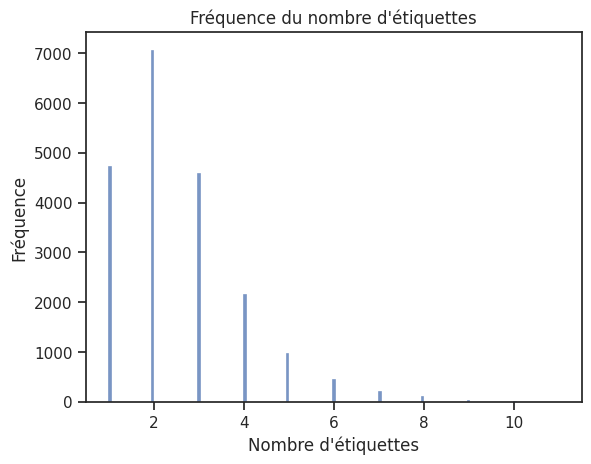

In [7]:
# À l'aide de seaborn, créez un histogramme du nombre d'étiquettes des rangées dans le DataFrame
# TODO
plot = sns.histplot(df, x  = "label_count", ).set(xlabel = "Nombre d'étiquettes", ylabel = "Fréquence", title="Fréquence du nombre d'étiquettes" )
plt.show()

Suivez les étapes ci-dessous pour créer un heatmap montrant la "corrélation" entre différentes étiquettes.
- Plus précisément, chaque cellule de la heatmap doit correspondre à la probabilité qu'un échantillon avec l'étiquette de ligne correspondante ait également l'étiquette de colonne correspondante.
- Considérez simplement les étiquettes ["Piano", "Classical music", "Speech", "Conversation", "Screaming"].

Votre graphique final devrait ressembler à ceci :

![alt text](images/heatmap.png "Heatmap")

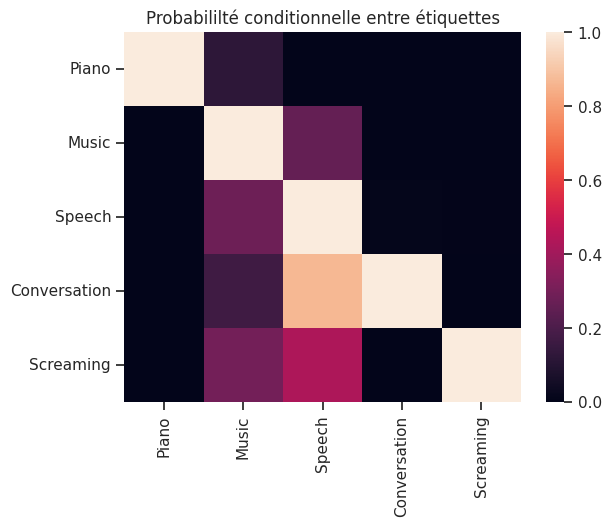

In [8]:
labels = ["Piano", "Music", "Speech", "Conversation", "Screaming"]

# Il y a plusieurs façons d'aborder cela, la façon que nous recommandons ici est de construire d'abord une grille 2D où chaque
# value est la valeur de corrélation entre la ligne/colonne correspondante à l'aide des fonctions créées dans q1.py.

# TODO
heat_labels = []
for label1 in labels:
    heat = [get_conditional_proportion(df["label_names"], label1, label2) for label2 in labels]
    heat_labels.append(heat)
ax = plt.axes()
sns.heatmap(heat_labels, xticklabels= labels, yticklabels = labels, ax = ax)
ax.set_title("Probabililté conditionnelle entre étiquettes")
plt.show()
# Ensuite, à l'aide de sns.heatmap, créez la heatmap, en profitant de xticklabels et yticklabels pour définir les noms des étiquettes comme valeurs de graduation

# TODO

## Question 2
La question 2 n'a pas de composante notebook, remplissez simplement le fichier `q2.py`.

## Question 3

Téléchargez l'audio pour les étiquettes suivantes à l'aide des fonction créées dans `q3.py`

In [9]:
from q3 import data_pipeline, rename_files, filter_df

SyntaxError: invalid syntax (q3.py, line 9)

In [ ]:
# Téléchargez "Cough"

# TODO

# Renommez les fichiers pour inclure le début et fin des échantillons ainsi que la durée

# TODO

In [ ]:
# Téléchargez "Hammer"

# TODO

# Renommez les fichiers pour inclure le début et fin des échantillons ainsi que la durée

# TODO

Comme vous l'avez probablement remarqué, le téléchargement de toutes ces données audio est lent (et en tant que tel, nous vous avons uniquement demandé de télécharger 2 des étiquettes). Dans de nombreux cas, il est possible d'obtenir des augmentations de performances significatives en utilisant soit le multiprocessing (https://docs.python.org/3/library/multiprocessing.html) soit le multithreading (https://docs.python.org/3/library/threading.html)  qui pourrait par exemple vous permettre de télécharger plusieurs fichiers audio en parallèle.

En règle générale, utilisez le multithreading lorsque vos programmes sont bloqués par l'IO (par exemple ici) et le multiprocessing lorsqu'ils sont bloqués CPU (et utilisez ainsi tous les cores de votre CPU).

## Question 4
Pour les cellules suivantes, utilisez l'ID "0GNNFBrRz1E". Complétez les fonctions et exécutez les cellules fournies ci-dessous.

In [ ]:
import librosa

In [ ]:
# Jouez le segment audio dans le notebook en utilisant
# https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.Audio

# TODO

Une façon de visualiser l'audio consiste à utiliser des spectrogrammes mel. Brièvement, les spectrogrammes Mel convertissent l'audio en une image 2D grâce à l'utilisation de Fourier Transforms (plus de détails peuvent être trouvés ici: https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53).

In [ ]:
stft_hopsize = 128
n_fft = 512
sample_rate = 16000

def to_log_scale(mel: np.ndarray) -> np.ndarray:
    mel = np.log(mel + 1e-6)/2.0
    return mel

def create_mel_spectrogram(mp3_path: str) -> np.ndarray:
    """ 
    CETTE FONCTION VOUS EST FOURNIE POUR VOUS AIDER.
    Vous devez toutefois remplir la fonction plot_audio() ci-dessous
    """
    data, sr = librosa.load(mp3_path, dtype='float32')
    librosa_mel = librosa.feature.melspectrogram(y=data, sr=sr, n_fft=512, hop_length=128)
    return to_log_scale(librosa_mel)

create_mel_spectrogram("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")

Les données audio peuvent également être visualisées en regardant la forme d'onde (c'est-à-dire sous la forme d'un tracé linéaire des valeurs d'amplitude). Nous combinerons les deux méthodes de visualisation ci-dessous. Le graphique résultant devrait ressembler à :
![alt text](images/combined_plot.png "Combined Plot")

In [ ]:
def plot_audio(mp3_path: str) -> None:
    """ 
    En utilisant matplotlib et create_mel_spectrogram() écrivez une fonction qui prend un mp3_path et trace
    à la fois la forme d'onde (graphique linéaire des amplitudes) et le spectrogramme mel côte à côte en tant que subplots.

    Utilisez le mp3_path comme titre principal unique pour tout le graphique

    Indice: Pour le graphique linéaire des amplitudes, essayez de juste de .plot les données retournées par librosa
    """
    # TODO
    

plot_audio("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")